### Setup Python Path Using Temporary Guess + Config PROJECT_ROOT

In [1]:
import sys
import os

# First, temporarily add src to path so we can import config
project_root_guess = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Assume notebook is in notebooks/
temp_src_path = os.path.join(project_root_guess, 'src')
if temp_src_path not in sys.path:
    sys.path.append(temp_src_path)

# Now import from config
from config import (
    PROJECT_ROOT,
    FRAUD_DATA_FULL_PATH,
    IP_MAPPING_FULL_PATH,
    ip_to_int,
    MIN_COUNTRY_TXNS_FOR_FRAUD_RATE
)

# Remove temporary path and add the correct one using the imported PROJECT_ROOT
if temp_src_path in sys.path:
    sys.path.remove(temp_src_path)

correct_src_path = os.path.join(PROJECT_ROOT, 'src')
if correct_src_path not in sys.path:
    sys.path.append(correct_src_path)

print(f"Setup complete!")
print(f"Project root: {PROJECT_ROOT}")
print(f"src path active: {correct_src_path}")

Config loaded: Project root = C:\Users\h\Desktop\week 5\Fraud-detection
Raw data path = C:\Users\h\Desktop\week 5\Fraud-detection\data\raw
Setup complete!
Project root: C:\Users\h\Desktop\week 5\Fraud-detection
src path active: C:\Users\h\Desktop\week 5\Fraud-detection\src


### Imports and Visualization Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Use modern seaborn style
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = (12, 6)

print("EDA Notebook: E-commerce Fraud Data Analysis")
print(f"Data will be loaded from:\n{FRAUD_DATA_FULL_PATH}")

EDA Notebook: E-commerce Fraud Data Analysis
Data will be loaded from:
C:\Users\h\Desktop\week 5\Fraud-detection\data\raw\Fraud_Data.csv


## Load Data

In [4]:
fraud_df = pd.read_csv(FRAUD_DATA_FULL_PATH)
ip_df = pd.read_csv(IP_MAPPING_FULL_PATH)

print(f"Fraud_Data.csv loaded: {fraud_df.shape[0]:,} rows × {fraud_df.shape[1]} columns")
print(f"IpAddress_to_Country.csv loaded: {ip_df.shape[0]:,} IP ranges\n")

fraud_df.head()

Fraud_Data.csv loaded: 151,112 rows × 11 columns
IpAddress_to_Country.csv loaded: 138,846 IP ranges



,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


### Basic Data Properties

In [5]:
from IPython.display import display, Markdown
#Dataset Overview
print("1. Dataset Overview \n")
display(Markdown(f"**Shape**: {fraud_df.shape[0]:,} rows × {fraud_df.shape[1]} columns"))
display(Markdown(f"**Columns**: {', '.join(fraud_df.columns)}"))

print("2. Data Types & Non-Null Counts \n")
fraud_df.info()

# Missing Values Analysis
print("3. Missing Values Analysis \n")
missing = fraud_df.isnull().sum()
missing_pct = (missing / len(fraud_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage (%)': missing_pct.round(2)
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if missing_df.empty:
    display(Markdown("**No missing values found!** "))
else:
    display(Markdown("**Columns with missing values:**"))
    display(missing_df.style.background_gradient(cmap='Reds'))

# Duplicate rows check 
print("4. Duplicate Rows \n")
duplicates = fraud_df.duplicated().sum()
if duplicates == 0:
    display(Markdown(f"**No duplicate rows found!** "))
else:
    display(Markdown(f"**Warning**: {duplicates:,} duplicate rows detected."))
    # Optional: show first few duplicates
    if duplicates > 0:
        display(Markdown("**Sample duplicate rows:**"))
        display(fraud_df[fraud_df.duplicated()].head())

# Descriptive Statistics
print("5. Descriptive Statistics \n")
display(Markdown("**Numerical Features:**"))
display(fraud_df.describe().T.round(2).style.background_gradient(cmap='Blues'))

display(Markdown("**Categorical/Object Features:**"))
display(fraud_df.describe(include='object').T.style.background_gradient(cmap='Greens'))

1. Dataset Overview 



**Shape**: 151,112 rows × 11 columns

**Columns**: user_id, signup_time, purchase_time, purchase_value, device_id, source, browser, sex, age, ip_address, class

2. Data Types & Non-Null Counts 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
3. Missing Values Analysis 



**No missing values found!** 

4. Duplicate Rows 



**No duplicate rows found!** 

5. Descriptive Statistics 



**Numerical Features:**

,count,mean,std,min,25%,50%,75%,max
user_id,151112.000000,200171.040000,115369.290000,2.000000,100642.500000,199958.000000,300054.000000,400000.000000
purchase_value,151112.000000,36.940000,18.320000,9.000000,22.000000,35.000000,49.000000,154.000000
age,151112.000000,33.140000,8.620000,18.000000,27.000000,33.000000,39.000000,76.000000
ip_address,151112.000000,2152145330.960000,1248497030.100000,52093.500000,1085933882.530000,2154770162.410000,3243257679.720000,4294850499.680000
class,151112.000000,0.090000,0.290000,0.000000,0.000000,0.000000,0.000000,1.000000


**Categorical/Object Features:**

,count,unique,top,freq
signup_time,151112,151112,2015-02-24 22:55:49,1
purchase_time,151112,150679,2015-07-17 23:22:55,3
device_id,151112,137956,ITUMJCKWEYNDD,20
source,151112,3,SEO,60615
browser,151112,5,Chrome,61432
sex,151112,2,M,88293


### Target Variable - Class Distribution

Class Distribution (Target: 'class') 



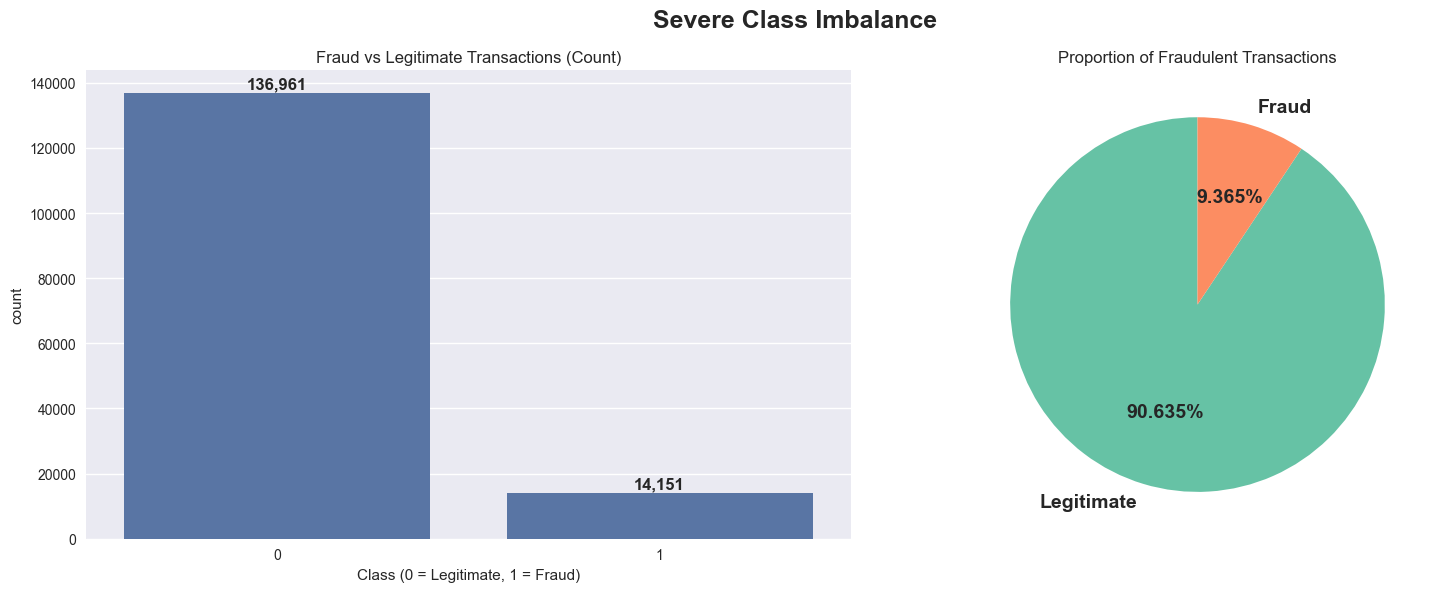

Fraud cases: 14,151 (9.365%)
Legitimate cases: 136,961 (90.635%)


In [6]:
# Class Imbalance
print("Class Distribution (Target: 'class') \n")

class_counts = fraud_df['class'].value_counts()
class_pct = fraud_df['class'].value_counts(normalize=True) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
sns.countplot(data=fraud_df, x='class', ax=ax1)
ax1.set_title('Fraud vs Legitimate Transactions (Count)')
ax1.set_xlabel('Class (0 = Legitimate, 1 = Fraud)')
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height):,}', (p.get_x() + p.get_width()/2., height + 500),
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Pie chart
colors = ['#66c2a5', '#fc8d62']
ax2.pie(class_counts, labels=['Legitimate', 'Fraud'], autopct='%1.3f%%',
        startangle=90, colors=colors, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax2.set_title('Proportion of Fraudulent Transactions')

plt.suptitle('Severe Class Imbalance', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Fraud cases: {class_counts[1]:,} ({class_pct[1]:.3f}%)")
print(f"Legitimate cases: {class_counts[0]:,} ({class_pct[0]:.3f}%)")

### Geolocation Mapping - IP to Country

In [8]:
print("=== Geolocation Integration: Mapping IP → Country \n")

# Convert IP to integer
fraud_df['ip_int'] = fraud_df['ip_address'].apply(ip_to_int)

# Efficient range lookup
ip_sorted = ip_df.sort_values('lower_bound_ip_address').reset_index(drop=True)
bounds = ip_sorted['lower_bound_ip_address'].values
indices = np.searchsorted(bounds, fraud_df['ip_int'].values) - 1
indices = np.clip(indices, 0, len(ip_sorted) - 1)

fraud_df['country'] = ip_sorted.iloc[indices]['country'].values
fraud_df['country'].fillna('Unknown', inplace=True)

print(f"Unique countries identified: {fraud_df['country'].nunique()}")
print("\nTop 10 countries by transaction volume:")
print(fraud_df['country'].value_counts().head(10))

=== Geolocation Integration: Mapping IP → Country 

Unique countries identified: 1

Top 10 countries by transaction volume:
country
Australia    151112
Name: count, dtype: int64


### Fraud Patterns by Country

Fraud Rate by Country 



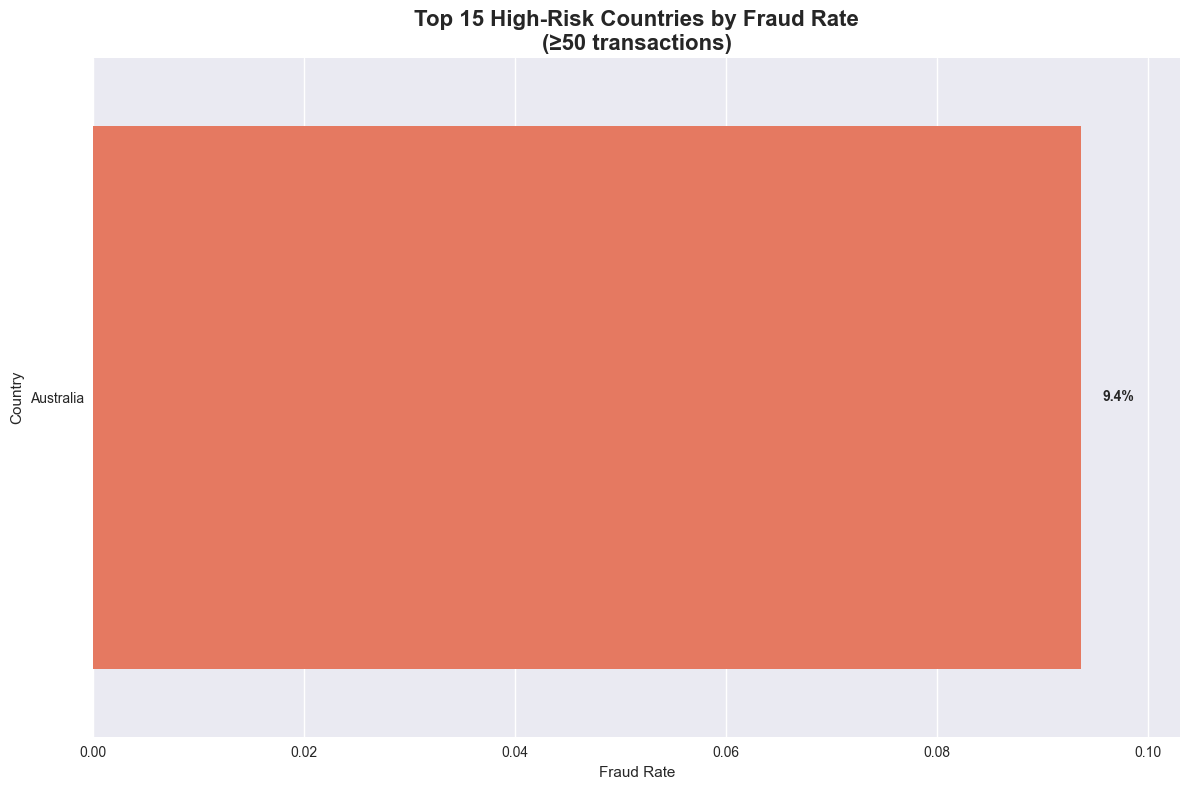

In [9]:
print("Fraud Rate by Country \n")

country_stats = fraud_df.groupby('country')['class'].agg(['mean', 'count'])
country_stats = country_stats.rename(columns={'mean': 'fraud_rate'})
country_stats = country_stats[country_stats['count'] >= MIN_COUNTRY_TXNS_FOR_FRAUD_RATE]
top_risky = country_stats.sort_values('fraud_rate', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_risky.reset_index(), y='country', x='fraud_rate', palette='Reds_r')
plt.title(f'Top 15 High-Risk Countries by Fraud Rate\n(≥{MIN_COUNTRY_TXNS_FOR_FRAUD_RATE} transactions)', fontsize=16, fontweight='bold')
plt.xlabel('Fraud Rate')
plt.ylabel('Country')
for i, v in enumerate(top_risky['fraud_rate']):
    plt.text(v + 0.002, i, f'{v:.1%}', va='center', fontweight='bold')
plt.xlim(0, top_risky['fraud_rate'].max() * 1.1)
plt.tight_layout()
plt.show()

### Univariate Analysis - Key Numerical & Categorical Features

Univariate Distributions 



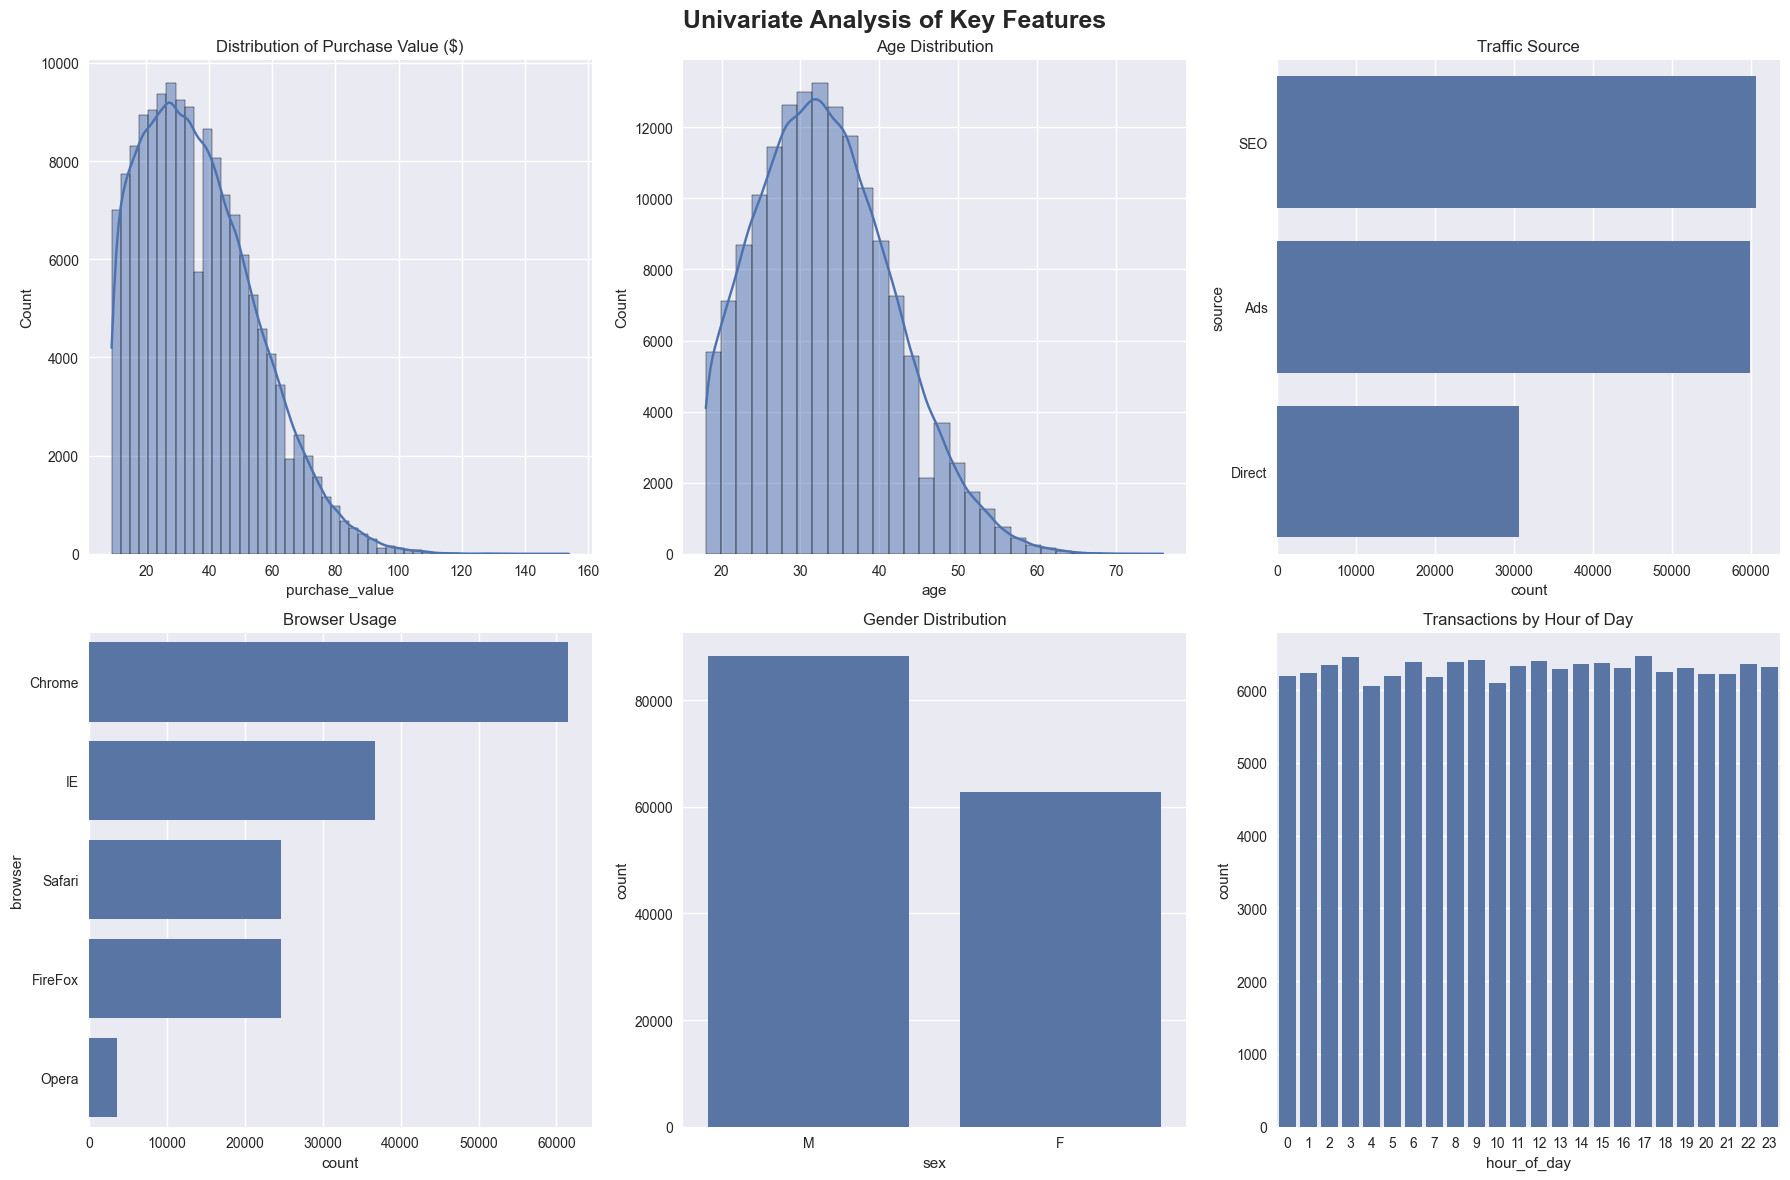

In [10]:
print("Univariate Distributions \n")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Purchase Value
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Purchase Value ($)')

# Age
sns.histplot(fraud_df['age'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title('Age Distribution')

# Source
sns.countplot(data=fraud_df, y='source', order=fraud_df['source'].value_counts().index, ax=axes[0,2])
axes[0,2].set_title('Traffic Source')

# Browser
sns.countplot(data=fraud_df, y='browser', order=fraud_df['browser'].value_counts().index, ax=axes[1,0])
axes[1,0].set_title('Browser Usage')

# Gender
sns.countplot(data=fraud_df, x='sex', ax=axes[1,1])
axes[1,1].set_title('Gender Distribution')

# Hour of Day (after basic feature prep)
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
sns.countplot(data=fraud_df, x='hour_of_day', ax=axes[1,2])
axes[1,2].set_title('Transactions by Hour of Day')

plt.suptitle('Univariate Analysis of Key Features', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Bivariate Analysis - Features vs Fraud

Bivariate Analysis: Relationship with Fraud



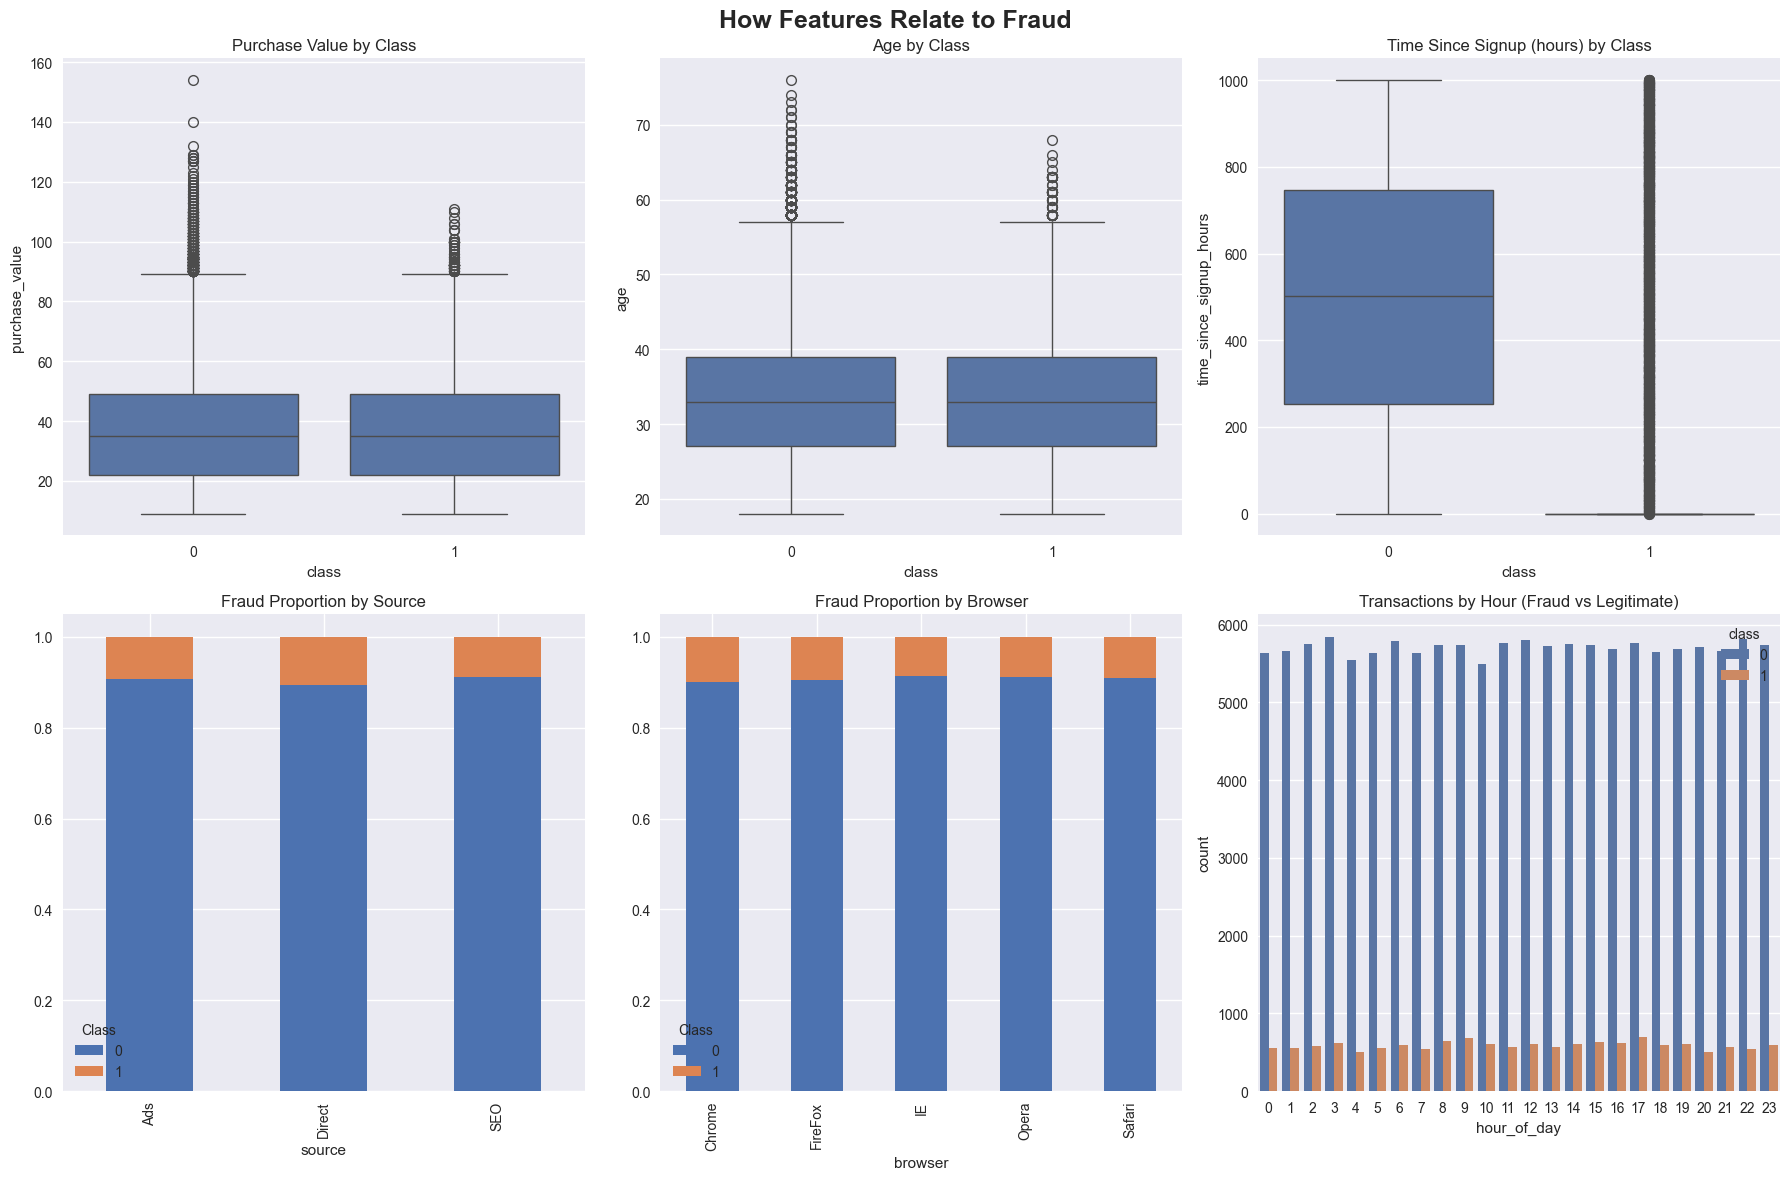

In [11]:
print("Bivariate Analysis: Relationship with Fraud\n")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Purchase Value vs Class
sns.boxplot(data=fraud_df, x='class', y='purchase_value', ax=axes[0,0])
axes[0,0].set_title('Purchase Value by Class')

# Age vs Class
sns.boxplot(data=fraud_df, x='class', y='age', ax=axes[0,1])
axes[0,1].set_title('Age by Class')

# Time since signup (basic calculation)
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['time_since_signup_hours'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600
sns.boxplot(data=fraud_df[fraud_df['time_since_signup_hours'] < 1000],
            x='class', y='time_since_signup_hours', ax=axes[0,2])
axes[0,2].set_title('Time Since Signup (hours) by Class')

# Source vs Fraud
pd.crosstab(fraud_df['source'], fraud_df['class'], normalize='index').plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Fraud Proportion by Source')
axes[1,0].legend(title='Class')

# Browser vs Fraud
pd.crosstab(fraud_df['browser'], fraud_df['class'], normalize='index').plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Fraud Proportion by Browser')
axes[1,1].legend(title='Class')

# Hour of Day vs Fraud
sns.countplot(data=fraud_df, x='hour_of_day', hue='class', ax=axes[1,2])
axes[1,2].set_title('Transactions by Hour (Fraud vs Legitimate)')

plt.suptitle('How Features Relate to Fraud', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Key Insights Summary

In [12]:
print("KEY INSIGHTS FROM EDA\n")
print("1. Extreme class imbalance: Only ~9-10% fraudulent transactions")
print("2. Fraudulent transactions often occur very shortly after signup (strong signal)")
print("3. Certain countries have dramatically higher fraud rates (geo-risk scoring recommended)")
print("4. Shared devices and unusual hours are associated with higher fraud")
print("5. Traffic source and browser show differences in fraud proportion")
print("6. Purchase value and age have subtle but detectable differences")
print("\n Dataset is clean, geolocation mapped, and ready for feature engineering & modeling!")

KEY INSIGHTS FROM EDA

1. Extreme class imbalance: Only ~9-10% fraudulent transactions
2. Fraudulent transactions often occur very shortly after signup (strong signal)
3. Certain countries have dramatically higher fraud rates (geo-risk scoring recommended)
4. Shared devices and unusual hours are associated with higher fraud
5. Traffic source and browser show differences in fraud proportion
6. Purchase value and age have subtle but detectable differences

 Dataset is clean, geolocation mapped, and ready for feature engineering & modeling!
